2. Classification. 
Use the Adventure Works Cycles customer data you worked with in challenge 1 to create a classification model that predicts whether or not a customer will purchase a bike. The model should predict bike purchasing for new customers for whom no information about average monthly spend or previous bike purchase is available. 

In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
Customer = pd.read_csv('Customer.csv')
Customer.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age,AgeGroup
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,M,1,0,0,2,137947,89,0,31,Between 25 and 45
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,S,0,1,3,3,101141,117,1,32,Between 25 and 45
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,M,1,1,3,3,91945,123,0,32,Between 25 and 45
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,S,0,1,0,0,86688,50,0,29,Between 25 and 45
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,S,1,4,5,5,92771,95,1,29,Between 25 and 45


In [3]:
#Check duplicate rows
print(Customer.shape)
print(Customer.CustomerID.unique().shape)

(16404, 23)
(16404,)


No duplicate found

In [4]:
#Check missing value
Customer.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
Age                     0
AgeGroup                0
dtype: int64

No missing value found

In [5]:
# Check the class imbalance of the dataset
BikeBuyer_counts = Customer[['AveMonthSpend', 'BikeBuyer']].groupby('BikeBuyer').count()
print(BikeBuyer_counts)

           AveMonthSpend
BikeBuyer               
0                  10949
1                   5455


Notice that there are one third of customers previously purchased a bike. There is a class inbalance in this dataset, that means using accuracy to measure the dataset can be misleading and need to be used cautiously and alongside other metrics. 

In [6]:
Customer.dtypes

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
Age                      int64
AgeGroup                object
dtype: object

In [7]:
Customer.nunique()

CustomerID              16404
FirstName                 662
LastName                  363
AddressLine1            11874
City                      267
StateProvinceName          51
CountryRegionName           6
PostalCode                321
PhoneNumber              7949
BirthDate                7896
Education                   5
Occupation                  5
Gender                      2
MaritalStatus               2
HomeOwnerFlag               2
NumberCarsOwned             5
NumberChildrenAtHome        6
TotalChildren               6
YearlyIncome            15469
AveMonthSpend             152
BikeBuyer                   2
Age                        70
AgeGroup                    4
dtype: int64

Based on the analysis of the data type and unique number of each feature above, we can see there are a few categorical features have so many unique values and they are not important for the data analysis such as CustomerID, Names, Address, PostalCode and PhoneNumber etc. So, we are going to leave them out from our analysis and only retain the following following categorical feautures: CountryRegionName, Education, Occupation, Gender, MaritalStatus and AgeGroup. 

In [8]:
#Encode categorical values
cal_df = Customer[['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'AgeGroup']]
cal_df_encoded = pd.get_dummies(data = cal_df)
cal_df_encoded.head()

,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,...,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,AgeGroup_Between 25 and 45,AgeGroup_Between 45 and 55,AgeGroup_Over 55,AgeGroup_Under 25
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,0


In [9]:
cal_df_encoded.shape

(16404, 24)

In [10]:
num_df = Customer[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']]
encoded_df = pd.concat([cal_df_encoded, num_df], axis=1, join= 'outer')

In [11]:
encoded_df.shape

(16404, 29)

## Split dataset

In [12]:
from sklearn.model_selection import train_test_split
nr.seed(9988)
labels = np.array(Customer['BikeBuyer'])
features = np.array(encoded_df)
X_train, X_test, Y_train, Y_test = train_test_split (encoded_df, labels, test_size=0.3)

In [13]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(11482, 29) (11482,)
(4922, 29) (4922,)


## Rescale values

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [17]:
X_train[:2,]

array([[ 2.02114596, -0.30393982, -0.32681107, -0.32746359, -0.33875844,
        -0.85531507, -0.63237842, -0.46564919, -0.46883089,  1.64434515,
        -0.30666722,  2.32307068, -0.44669937, -0.38630857, -0.65362212,
        -0.57446735,  1.01068238, -1.01068238, -1.07679545,  1.07679545,
        -1.29261506, -0.40165028,  4.10910394, -0.46786319, -1.43933877,
         0.43811237, -0.65272852, -0.00589171, -0.79290029],
       [-0.49476882, -0.30393982, -0.32681107, -0.32746359,  2.95195596,
        -0.85531507, -0.63237842, -0.46564919, -0.46883089,  1.64434515,
        -0.30666722,  2.32307068, -0.44669937, -0.38630857, -0.65362212,
        -0.57446735,  1.01068238, -1.01068238, -1.07679545,  1.07679545,
        -1.29261506, -0.40165028, -0.24336206,  2.13737695,  0.69476347,
        -0.43567715, -0.65272852, -1.19270998, -0.65094255]])

## Build models

### Logistic regression model 

In [18]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
print(lm.intercept_)
print(lm.coef_)

[-1.03948399]
[[-0.04429792  0.05551899 -0.01233644 -0.02153491  0.01024311  0.01833874
   0.11609744  0.04162943 -0.08113958  0.00994109 -0.1484187  -0.02702864
  -0.06362348 -0.00400714  0.0322922   0.04645942 -0.17171045  0.17171045
  -0.38582964  0.38582964  0.3212986  -0.15991896 -0.55964409  0.07396459
   0.03990936  0.02390833  1.15061772 -0.09726548  0.37462689]]


In [20]:
probabilities = lm.predict_proba(X_test)
print(probabilities[:15,:])

[[0.97292554 0.02707446]
 [0.86630116 0.13369884]
 [0.62978232 0.37021768]
 [0.57682046 0.42317954]
 [0.17690558 0.82309442]
 [0.74562928 0.25437072]
 [0.52133664 0.47866336]
 [0.80940571 0.19059429]
 [0.7444835  0.2555165 ]
 [0.98959798 0.01040202]
 [0.38462282 0.61537718]
 [0.78908171 0.21091829]
 [0.32334889 0.67665111]
 [0.84083267 0.15916733]
 [0.9561477  0.0438523 ]]


### Score and evaluate the classification model

In [21]:
def score_model(probs, threshold):
    return np.array([1 if x>threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(Y_test[:15])

[0 0 0 0 1 0 0 0 0 0 1 0 1 0 0]
[0 1 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [22]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(Y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2934               333
Actual negative       664               991

Accuracy  0.80
 
           Positive      Negative
Num case     3267          1655
Precision    0.82          0.75
Recall       0.90          0.60
F1           0.85          0.67


Examine the results:
1. The confusion matrix shows the following characteristics; a) most of trhe positive cases are correctly classified, 2936 v 331, however, many negative cases are scored incorrectly, with only 989 correct v 666 incorrect. <br>
2. The overall accuracy is 0.80, however it might be misleaeding given it is class imbalance. <br>
3. The class imbalance is confirmed. Of the 4922 test cases, 3267 are positive and 1655 are negative. <br>
4. The precision, recall and F1 all show that positive cases are classified reasonably well. 


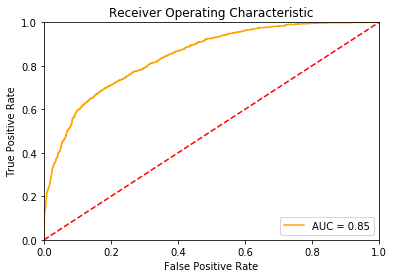

In [23]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(Y_test, probabilities)   

### Find a better threshold

In [24]:
#def test_threshold(probs, labels, threshold):
    #scores = score_model(probs, threshold)
   # print('')
    #print('For threshold = ' + str(threshold))
    #print_metrics(labels, scores)

#thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
#for t in thresholds:
    #test_threshold(probabilities, Y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2865               402
Actual negative       614              1041

Accuracy  0.79
 
           Positive      Negative
Num case     3267          1655
Precision    0.82          0.72
Recall       0.88          0.63
F1           0.85          0.67

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2742               525
Actual negative       540              1115

Accuracy  0.78
 
           Positive      Negative
Num case     3267          1655
Precision    0.84          0.68
Recall       0.84          0.67
F1           0.84          0.68

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2584               683
Actual negative       465              1190

Accuracy  0.77
 
           Positive      Negative
Num cas

Given that we are predicting the people who is going to be BikeBuyer, it is these positive cases that are of greatest importance to the company, so we choose the threshold that correctly identify the most of positive cases and have higher value for precision, recall and F1, which is when threshold is 0.5

In [25]:
test = pd.read_csv('AW_test.csv')

In [26]:
print(test.shape)
test.head()

(500, 20)


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,1/05/1945,45,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/04/1964,64,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,1/12/1934,34,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,22/09/1958,58,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,19/03/1965,65,High School,Manual,F,M,1,1,2,2,21876


In [27]:
#Convert BirthDate data format
test['BirthDate']= pd.to_datetime(test.BirthDate)
#Insert the date of data collection 1st Jan 1998
DataCollectionDate= '1998-01-01'
DataCollectionDate=pd.to_datetime(DataCollectionDate)

In [28]:
#Convert BirthDate into age at the collection date
from datetime import date
def calculateAge(birthday):
    age = DataCollectionDate.year - birthday.year - ((DataCollectionDate.month, DataCollectionDate.day)<(birthday.month, birthday.day))
    return age

test['Age'] = test['BirthDate'].apply(calculateAge)

In [29]:
#Classify Customers into age groups
test['AgeGroup']=''
test.loc[(test['Age']<25),'AgeGroup']='Under 25'
test.loc[(test['Age']>=25) & (test['Age']<=45), 'AgeGroup']='Between 25 and 45'
test.loc[(test['Age']>45) & (test['Age']<=55), 'AgeGroup']='Between 45 and 55'
test.loc[(test['Age']>55), 'AgeGroup']='Over 55'

In [30]:
#Encode categorical values
test_cal_df = Customer[['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'AgeGroup']]
test_cal_df_encoded = pd.get_dummies(data = test_cal_df)
test_cal_df_encoded.head()

,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,...,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,AgeGroup_Between 25 and 45,AgeGroup_Between 45 and 55,AgeGroup_Over 55,AgeGroup_Under 25
0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,0,1,0,1,1,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [31]:
test_num_df = test[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']]
test_encoded_df = pd.concat([test_cal_df_encoded, test_num_df], axis=1, join= 'outer')

In [33]:
test_features = scaler.transform(test_encoded_df)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [34]:
test_predictions= lm.predict(test_features)
print(test_predictions)

[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 

In [36]:
test_predictions = pd.DataFrame(data=test_predictions);
test_predictions.reset_index();
cid = pd.DataFrame(data=test['CustomerID']);
cid.reset_index();
predictions_with_cid = pd.merge(cid, test_predictions, left_index=True, right_index=True);

In [37]:
predictions_with_cid

,CustomerID,0
0,18988,0
1,29135,1
2,12156,0
3,13749,0
4,27780,0
5,16375,0
6,16109,1
7,15606,1
8,20888,1
9,20716,0


In [38]:
# Save the result 
predictions_with_cid.to_csv('Classification_prediction.csv')

Accuracy 0.792 <br>
Grade 97%
